In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matlab.engine
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import scipy.optimize
import os
import PyQt5 
from process.atlas import Atlas
import visualize.visualizer as vis
import process.file as f
import utils.utils as uti
import eval.eval as ev

atlas = Atlas()
neuron_dict = atlas.create_dictionary()
df_atlas = atlas.get_df()

# switch between qt and inline to have plots pop up in interactive window or not

In [ ]:
avg_xyz = 0
avg_rgb = 0
count = 0
avg_acc = 0

for folder in os.listdir('data/NP_foco'):
    if folder =='.DS_Store':
        continue

    df_data = f.proc_FOCO('data/NP_foco/'+folder)
    print(folder)

    cost_xyz, cost_rgb = uti.calc_costs(atlas.df, atlas.sigma, df_data)
    per_ID, per_correct, per_top2, correctID, correcttop2 = uti.check_accuracy(df_data)
    avg_xyz += cost_xyz
    avg_rgb += cost_rgb
    avg_acc += per_correct
    count += 1

print('Average cost: ' + str((avg_xyz+avg_rgb)/count))
print('Average accuracy: '+str(avg_acc/count))

In [ ]:
def get_average_acc(folder):
    avg_xyz = 0
    avg_rgb = 0
    count = 0
    avg_acc = 0

    for fold in os.listdir(folder):
        if fold =='.DS_Store':
            continue

        df_data = f.proc_FOCO(folder + '/'+fold)
    
        cost_xyz, cost_rgb = uti.calc_costs(atlas.df, atlas.sigma, df_data)
        per_ID, per_correct, per_top2, correctID, correcttop2 = uti.check_accuracy(df_data)
        avg_xyz += cost_xyz
        avg_rgb += cost_rgb
        avg_acc += per_correct
        count += 1

    print('Average cost: ' + str((avg_xyz+avg_rgb)/count))
    print('Average accuracy: '+str(avg_acc/count))

2022-04-26-w00-NP1
dataset
total alignment cost:4.073434283310498
percent accuracy:0.10526315789473684


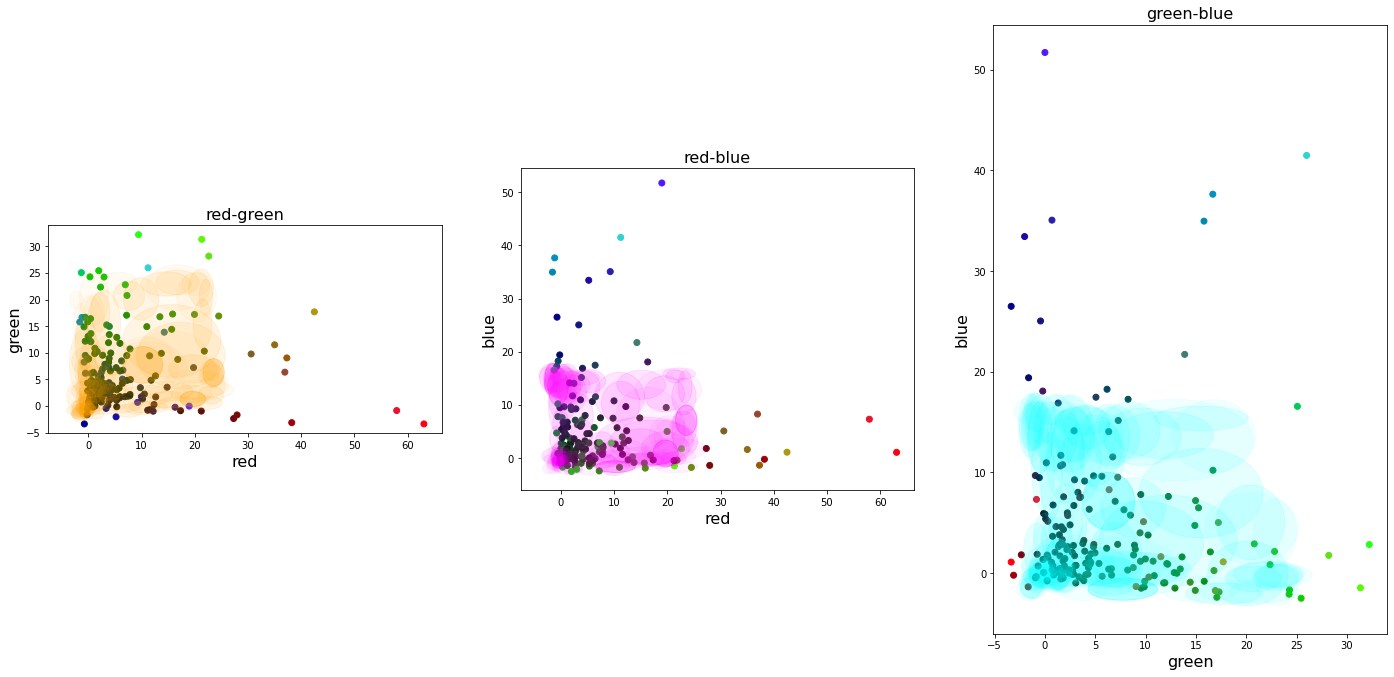

dataset
total alignment cost:4.433230434456708
percent accuracy:0.13157894736842105


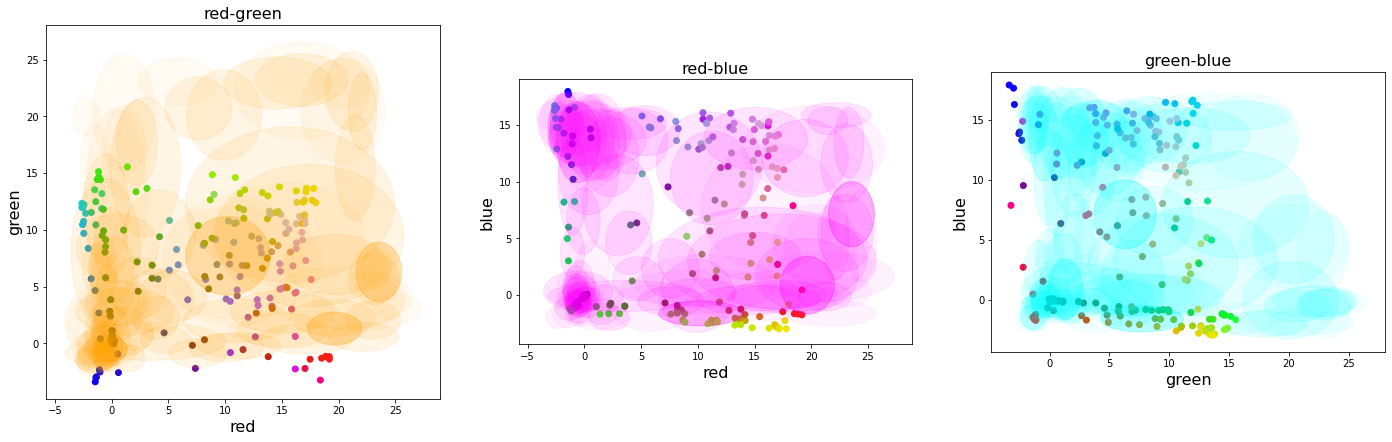

dataset
total alignment cost:4.1728676596894205
percent accuracy:0.6052631578947368


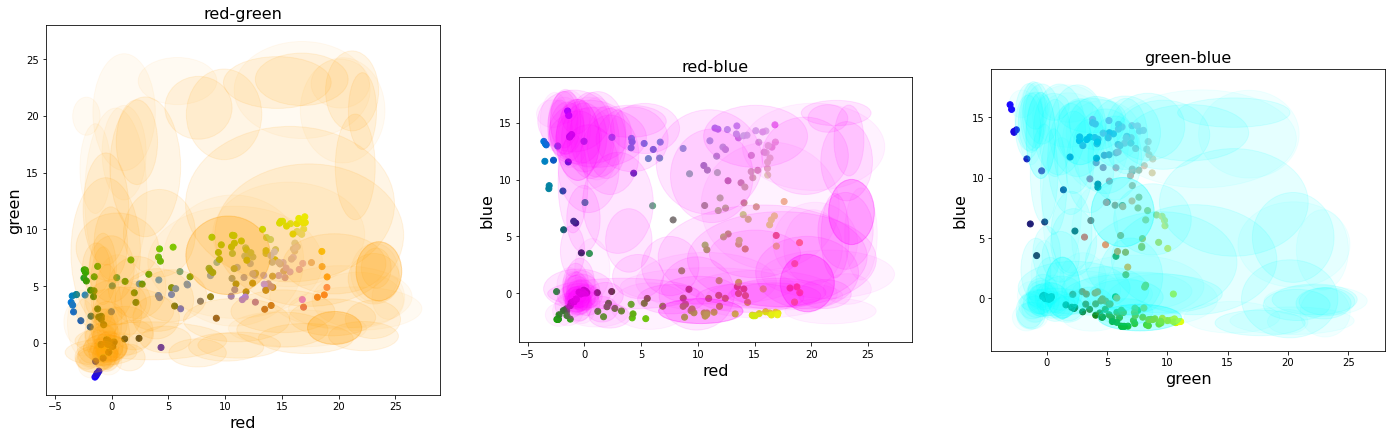

2022-04-26-w01-NP1
dataset
total alignment cost:4.606821728925013
percent accuracy:0.4166666666666667


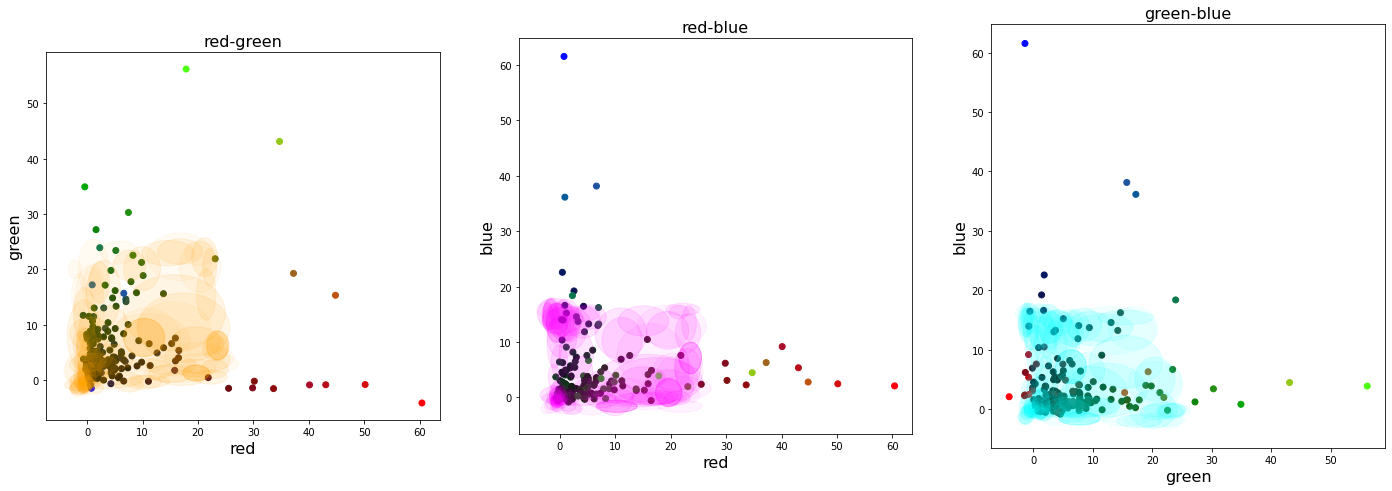

dataset
total alignment cost:3.677451818616471
percent accuracy:0.4444444444444444


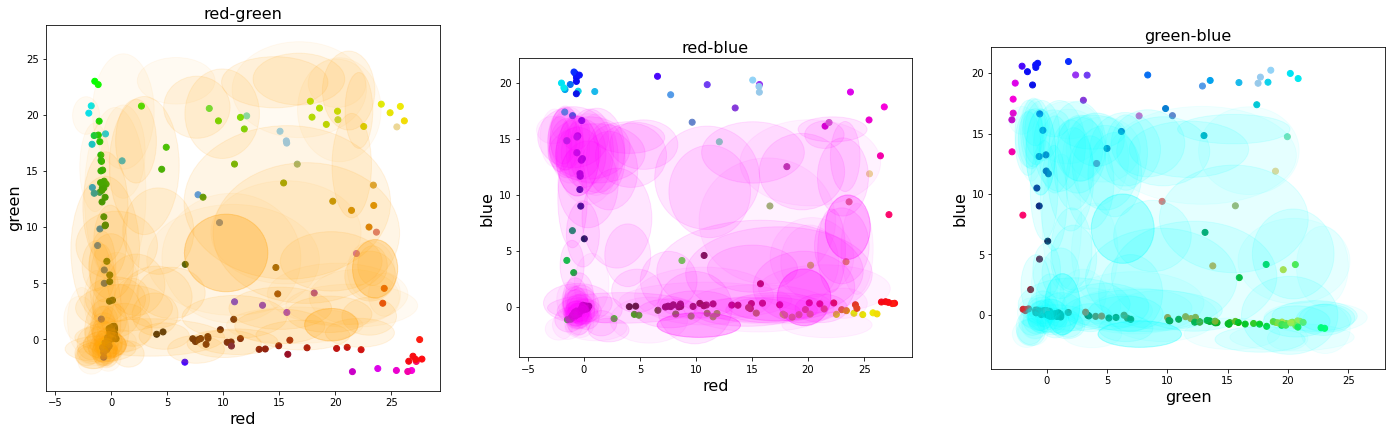

dataset
total alignment cost:3.537333459928842
percent accuracy:0.6666666666666666


KeyboardInterrupt: 

In [10]:
%matplotlib inline

def plot_compare_datasets(atlas, datasets, plots):

    for folder in os.listdir(datasets[0]):
        print(folder)
        if folder =='.DS_Store':
            continue
        for dataset in datasets:
            print(dataset)
            df_data = f.proc_FOCO(dataset +'/'+folder)
            cost_xyz, cost_rgb = uti.calc_costs(atlas.df, atlas.sigma, df_data)
            per_ID, per_correct, per_top2, correctID, correcttop2 = uti.check_accuracy(df_data)
            cost_xyz_orig, cost_rgb_orig = uti.calc_costs(atlas.df, atlas.sigma, df_orig)
            per_ID_og, per_correct_og, per_top2_og, correctID_og, correcttop2_og = uti.check_accuracy(df_orig)
            print('total alignment cost:' + str(cost_xyz+cost_rgb))
            print('percent accuracy:' + str(per_correct))

            if plots == 'RGB_super':
                vis.plot_RGB_super(atlas.df, atlas.sigma, df_data)
            elif plots == 'all':
                vis.plot_all(atlas.df, atlas.sigma, df_data)

plot_compare_datasets(atlas, ['data/NP_FOCO_cropped', 'data/NP_FOCO_hist', 'data/NP_FOCO_trans'], plots='RGB_super')

In [ ]:
%matplotlib qt

folder = 'data/NP_FOCO_set_color/2022-02-12-w01-NP1'
df_data = f.proc_FOCO(folder)
df_neur = ev.check_neurons(atlas.neur_dict, df_data, plot=True, name='2022-02-12-w01-NP1')





In [ ]:
%matplotlib qt

ev.summarize('NP_FOCO_trans', atlas, type='FOCO')

In [ ]:
%matplotlib qt
import eval.eval as ev
import numpy as np
import pandas as pd

ev.comp_acc()

In [ ]:
%matplotlib inline
vis.plot_all(atlas.df, atlas.sigma, f.proc_Chaud('data/NP_chaudhary/5'))